# Лабораторна робота №6
Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

Постановка задачі: Ознайомтесь з теоретичним матеріалом. Створіть програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

Протокол підготував студент групи ФБ-21 Шабанов Кирило

In [76]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Завдання 1:
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

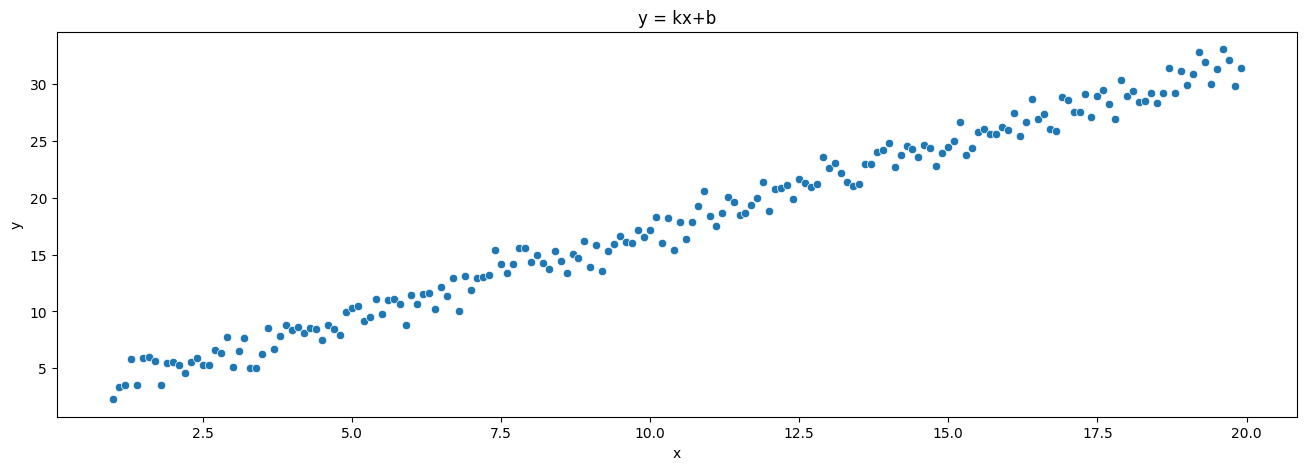

In [77]:
#Original function
x = np.arange(1,20,0.1)
b = 2
k = 1.5
y = k*x+b
#add noise
def gen_random_data(y,size,scale):
    f = np.random.normal(loc = y, scale=scale, size=size)
    return f

y_0 = gen_random_data(y, y.shape[0],1)

plt.figure(figsize=(16,5))
plt.title('y = kx+b')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(x=x,y=y_0)
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [78]:
def least_square_method(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    k = np.sum((x-mean_x)*(y-mean_y))/np.sum((x-mean_x)**2)
    b = mean_y - k*mean_x

    return k,b

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [79]:
#numpy library 
f2 = np.polyfit(x,y_0,1)
y2 = f2[0]*x+f2[1]
y2-y

array([-8.63127435e-03, -7.77117512e-03, -6.91107590e-03, -6.05097667e-03,
       -5.19087745e-03, -4.33077822e-03, -3.47067900e-03, -2.61057977e-03,
       -1.75048055e-03, -8.90381320e-04, -3.02820943e-05,  8.29817131e-04,
        1.68991636e-03,  2.55001558e-03,  3.41011481e-03,  4.27021403e-03,
        5.13031326e-03,  5.99041248e-03,  6.85051171e-03,  7.71061093e-03,
        8.57071016e-03,  9.43080938e-03,  1.02909086e-02,  1.11510078e-02,
        1.20111071e-02,  1.28712063e-02,  1.37313055e-02,  1.45914047e-02,
        1.54515040e-02,  1.63116032e-02,  1.71717024e-02,  1.80318016e-02,
        1.88919009e-02,  1.97520001e-02,  2.06120993e-02,  2.14721985e-02,
        2.23322978e-02,  2.31923970e-02,  2.40524962e-02,  2.49125954e-02,
        2.57726947e-02,  2.66327939e-02,  2.74928931e-02,  2.83529923e-02,
        2.92130916e-02,  3.00731908e-02,  3.09332900e-02,  3.17933892e-02,
        3.26534885e-02,  3.35135877e-02,  3.43736869e-02,  3.52337861e-02,
        3.60938854e-02,  

4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

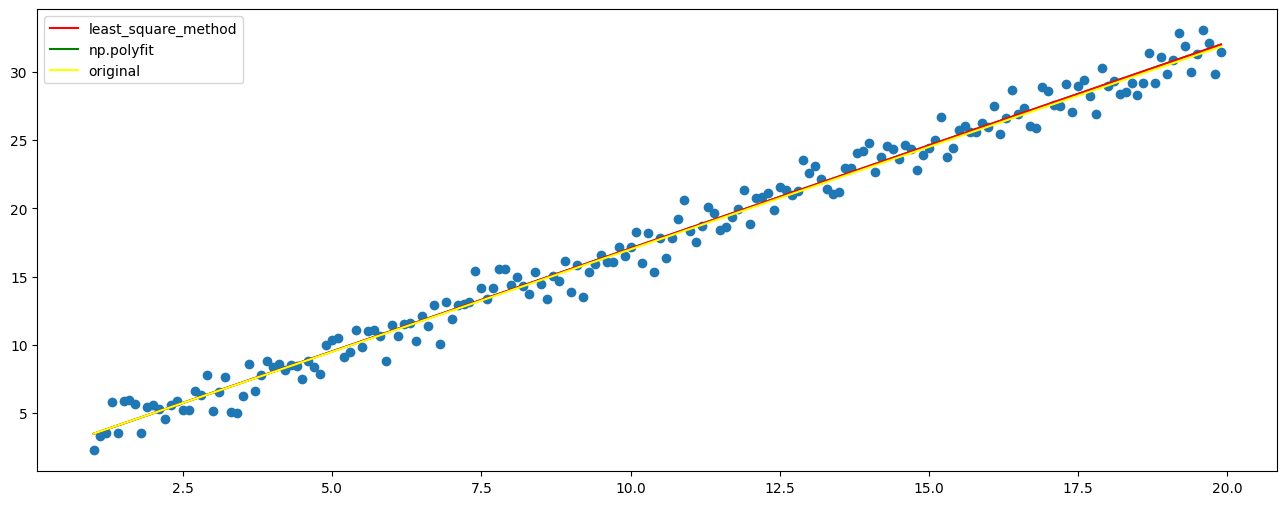

In [80]:
#least_square_method
k1,b1 = least_square_method(x,y_0)
y1 = k1*x+b1

#graphic function
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)


l2, = ax.plot(x,y2,color='green')
l1, = ax.plot(x,y1,color='red')
l3, = ax.plot(x,y,color='yellow')
ax.legend([l1, l2, l3], ['least_square_method', 'np.polyfit', 'original'])
plt.show()

Завдання 2 (2б):
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [81]:
def grad_descent(x,y,k,b,learning_rate, iter_n):
    params = np.zeros(shape=(2,))
    n = y.shape[0]
    for _ in range(iter_n):
        f = k*x+b
        d1_b = (-2/n)*np.sum(y-f)
        d2_k = (-2/n)*np.sum(x*(y-f))
        b = b-learning_rate*d1_b
        k = k-learning_rate*d2_k

    params[0] = k
    params[1] = b
    return params

params = grad_descent(x,y_0,0,0,0.003515,10000)

y3 = params[0]*x+params[1]

2. Додайте отриману лінію регресії на загальний графік

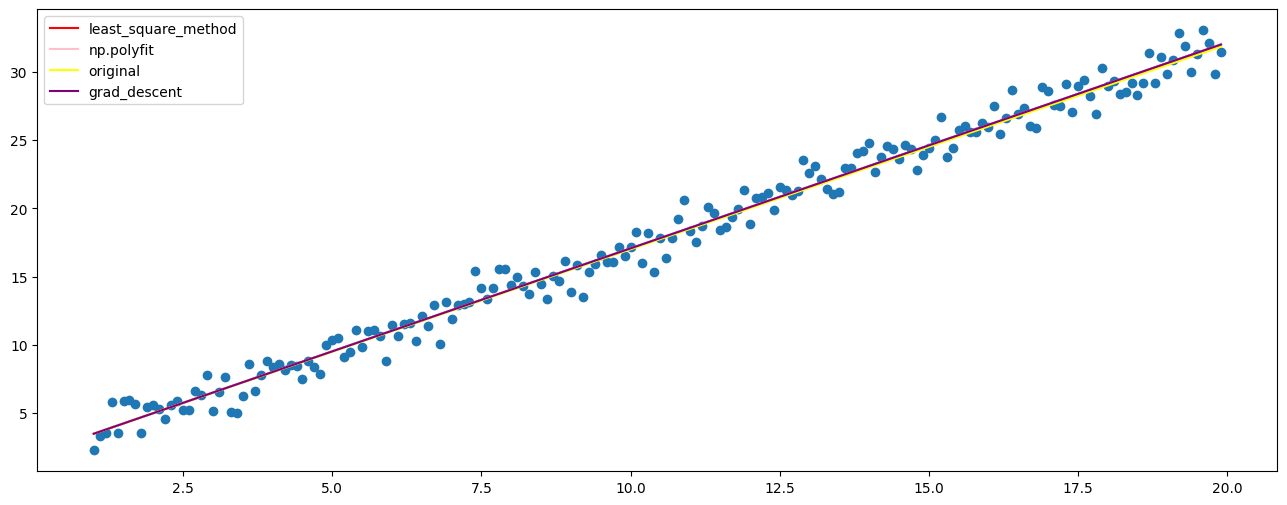

In [82]:
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.scatter(x,y_0)

l1, = ax.plot(x,y1,color='red')
l2, = ax.plot(x,y2,color='pink')
l3, = ax.plot(x,y,color='yellow')
l4, = ax.plot(x,y3,color='purple')
ax.legend([l1, l2, l3,l4], ['least_square_method', 'np.polyfit', 'original','grad_descent'])
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

In [83]:
def mst_func(y,y_tilda):
    n = y.shape[0]
    res = np.sum((y-y_tilda)**2)/n
    return res

In [84]:
iters = np.arange(0,1000,1)
mst_v = np.zeros(iters.shape)

for i in iters:
    if i==0:
        mst_v[i]=np.nan
        continue
    
    params1 = grad_descent(x,y_0,0,0,0.003515,i)
    func = params1[0]*x+params1[1]
    mst_v[i] =  mst_func(y_0,func)

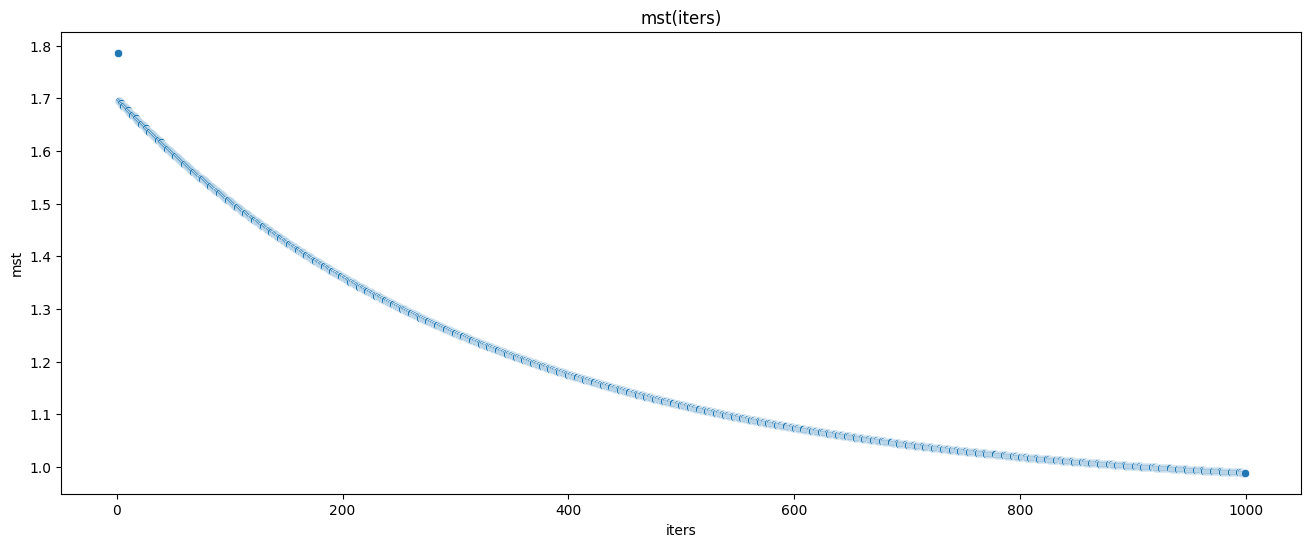

In [85]:
plt.figure(figsize=(16,6))
plt.xlabel('iters')
plt.ylabel('mst')
sns.scatterplot(x=iters,y=mst_v)
plt.title('mst(iters)')
plt.show()

З графіку видно, що чим більша кількість ітерацій, тим значення MST ближче до нуля => підвищення точності прогнозів

4. Порівняйте отримані результати з результатами попереднього завдання

In [86]:
print(y3-y1)

[-4.71347255e-07 -4.67517702e-07 -4.63688150e-07 -4.59858598e-07
 -4.56029046e-07 -4.52199494e-07 -4.48369942e-07 -4.44540389e-07
 -4.40710838e-07 -4.36881286e-07 -4.33051734e-07 -4.29222181e-07
 -4.25392630e-07 -4.21563078e-07 -4.17733524e-07 -4.13903972e-07
 -4.10074422e-07 -4.06244869e-07 -4.02415316e-07 -3.98585765e-07
 -3.94756213e-07 -3.90926661e-07 -3.87097108e-07 -3.83267557e-07
 -3.79438005e-07 -3.75608452e-07 -3.71778900e-07 -3.67949348e-07
 -3.64119797e-07 -3.60290244e-07 -3.56460692e-07 -3.52631140e-07
 -3.48801589e-07 -3.44972035e-07 -3.41142485e-07 -3.37312930e-07
 -3.33483380e-07 -3.29653830e-07 -3.25824274e-07 -3.21994724e-07
 -3.18165171e-07 -3.14335619e-07 -3.10506067e-07 -3.06676515e-07
 -3.02846962e-07 -2.99017410e-07 -2.95187860e-07 -2.91358306e-07
 -2.87528756e-07 -2.83699201e-07 -2.79869651e-07 -2.76040097e-07
 -2.72210546e-07 -2.68380996e-07 -2.64551442e-07 -2.60721889e-07
 -2.56892337e-07 -2.53062787e-07 -2.49233233e-07 -2.45403683e-07
 -2.41574128e-07 -2.37744